In [1]:
#Python Dependencies
from __future__ import print_function
import pathlib
from pathlib import Path
import os
import sys
import cv2
import numpy as np
from PIL import Image
import csv
import shutil
import random
import glob

In [2]:
DATA_PATH = '/Users/masterambassador/Slitherin/Celeb Images/cimagesmain/'
DATA_PATH2 = '/Users/masterambassador/Slitherin/Celeb Images/cimagescencrop/'
names  = os.listdir(DATA_PATH)
size = (200, 200)
for name in names:
    if name == '.DS_Store':
        print(name)
    else:
        im = Image.open(DATA_PATH+name)
        width, height = im.size   # Get dimensions
        new_width = width*0.6
        new_height= height*0.6

        left = (width - new_width)/2
        top = (height - new_height)/2
        right = (width + new_width)/2
        bottom = (height + new_height)/2

        im = im.crop((left, top, right, bottom))
        im =im.resize(size, Image.ANTIALIAS)
        im.save(DATA_PATH2+name)


.DS_Store


In [3]:
a = []
for name in names:
    if name == '.DS_Store':
        print(name)
    else:
        im = Image.open(DATA_PATH2+name)
        imx = np.array(im)
        imx = imx.reshape(-1)
        a.append(imx)
    
a =np.asarray(a)
print(a.shape)
np.savetxt('images.txt', a)

.DS_Store
(2005, 120000)


In [22]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(a)
X_pca = pca.transform(a)

In [23]:
print("original shape:   ", a.shape)
print("transformed shape:", X_pca.shape)

original shape:    (2005, 120000)
transformed shape: (2005, 2)


In [6]:
print(pca.components_)

[[0.0029873  0.0030214  0.0029265  ... 0.00338323 0.00320245 0.00288112]
 [0.00243173 0.0026797  0.00267294 ... 0.00163591 0.00181295 0.00189552]]


In [7]:
print(pca.explained_variance_)

[95795617.7117196  40808290.90747675]


In [8]:
print(pca.explained_variance_ratio_)

[0.23004837 0.09799906]


In [11]:
reduced_a = pca.transform(a)
reduced_a.shape

(2005, 2)

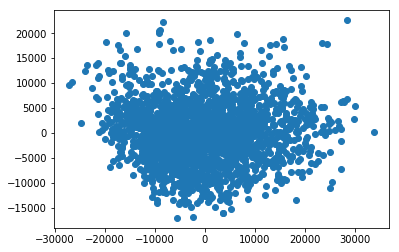

In [11]:
plt.scatter(x,y)
plt.show()

In [12]:
from matplotlib import pyplot as plt
x = reduced_a[:,:1]
y = reduced_a[:,1:2]
print(y)

[[  -27.80104118]
 [-2381.06954219]
 [  231.5940914 ]
 ...
 [-4062.9172436 ]
 [-2166.7759189 ]
 [-3267.05201866]]


In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [27]:
pca = decomposition.PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Colormap spectral is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

We can now plot the first two principal components of each point to learn about the data:
Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

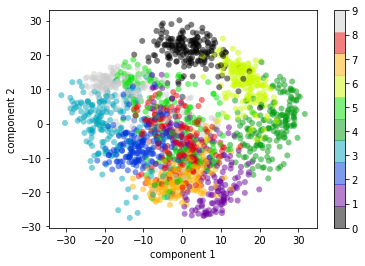

In [41]:
#see extensive colormap dependencies at the end
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [42]:
plt.savefig('spectralpcascatterplot.png')

<Figure size 432x288 with 0 Axes>

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

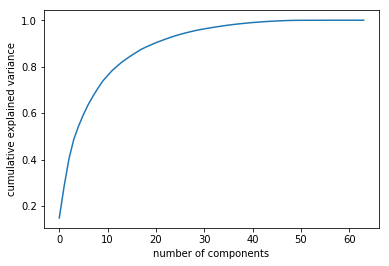

In [43]:
pca = decomposition.PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [44]:
plt.savefig('variance explained.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA

# load dataset

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 

# PCA
pca = PCA(n_components=2)
pca.fit_transform(data_scaled)

# Dump components relations with features:
print pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2'])

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');



In [37]:
__all__ = ['magma', 'inferno', 'plasma', 'viridis']

_magma_data = [[0.001462, 0.000466, 0.013866],
               [0.002258, 0.001295, 0.018331],
               [0.003279, 0.002305, 0.023708],
               [0.004512, 0.003490, 0.029965],
               [0.005950, 0.004843, 0.037130],
               [0.007588, 0.006356, 0.044973],
               [0.009426, 0.008022, 0.052844],
               [0.011465, 0.009828, 0.060750],
               [0.013708, 0.011771, 0.068667],
               [0.016156, 0.013840, 0.076603],
               [0.018815, 0.016026, 0.084584],
               [0.021692, 0.018320, 0.092610],
               [0.024792, 0.020715, 0.100676],
               [0.028123, 0.023201, 0.108787],
               [0.031696, 0.025765, 0.116965],
               [0.035520, 0.028397, 0.125209],
               [0.039608, 0.031090, 0.133515],
               [0.043830, 0.033830, 0.141886],
               [0.048062, 0.036607, 0.150327],
               [0.052320, 0.039407, 0.158841],
               [0.056615, 0.042160, 0.167446],
               [0.060949, 0.044794, 0.176129],
               [0.065330, 0.047318, 0.184892],
               [0.069764, 0.049726, 0.193735],
               [0.074257, 0.052017, 0.202660],
               [0.078815, 0.054184, 0.211667],
               [0.083446, 0.056225, 0.220755],
               [0.088155, 0.058133, 0.229922],
               [0.092949, 0.059904, 0.239164],
               [0.097833, 0.061531, 0.248477],
               [0.102815, 0.063010, 0.257854],
               [0.107899, 0.064335, 0.267289],
               [0.113094, 0.065492, 0.276784],
               [0.118405, 0.066479, 0.286321],
               [0.123833, 0.067295, 0.295879],
               [0.129380, 0.067935, 0.305443],
               [0.135053, 0.068391, 0.315000],
               [0.140858, 0.068654, 0.324538],
               [0.146785, 0.068738, 0.334011],
               [0.152839, 0.068637, 0.343404],
               [0.159018, 0.068354, 0.352688],
               [0.165308, 0.067911, 0.361816],
               [0.171713, 0.067305, 0.370771],
               [0.178212, 0.066576, 0.379497],
               [0.184801, 0.065732, 0.387973],
               [0.191460, 0.064818, 0.396152],
               [0.198177, 0.063862, 0.404009],
               [0.204935, 0.062907, 0.411514],
               [0.211718, 0.061992, 0.418647],
               [0.218512, 0.061158, 0.425392],
               [0.225302, 0.060445, 0.431742],
               [0.232077, 0.059889, 0.437695],
               [0.238826, 0.059517, 0.443256],
               [0.245543, 0.059352, 0.448436],
               [0.252220, 0.059415, 0.453248],
               [0.258857, 0.059706, 0.457710],
               [0.265447, 0.060237, 0.461840],
               [0.271994, 0.060994, 0.465660],
               [0.278493, 0.061978, 0.469190],
               [0.284951, 0.063168, 0.472451],
               [0.291366, 0.064553, 0.475462],
               [0.297740, 0.066117, 0.478243],
               [0.304081, 0.067835, 0.480812],
               [0.310382, 0.069702, 0.483186],
               [0.316654, 0.071690, 0.485380],
               [0.322899, 0.073782, 0.487408],
               [0.329114, 0.075972, 0.489287],
               [0.335308, 0.078236, 0.491024],
               [0.341482, 0.080564, 0.492631],
               [0.347636, 0.082946, 0.494121],
               [0.353773, 0.085373, 0.495501],
               [0.359898, 0.087831, 0.496778],
               [0.366012, 0.090314, 0.497960],
               [0.372116, 0.092816, 0.499053],
               [0.378211, 0.095332, 0.500067],
               [0.384299, 0.097855, 0.501002],
               [0.390384, 0.100379, 0.501864],
               [0.396467, 0.102902, 0.502658],
               [0.402548, 0.105420, 0.503386],
               [0.408629, 0.107930, 0.504052],
               [0.414709, 0.110431, 0.504662],
               [0.420791, 0.112920, 0.505215],
               [0.426877, 0.115395, 0.505714],
               [0.432967, 0.117855, 0.506160],
               [0.439062, 0.120298, 0.506555],
               [0.445163, 0.122724, 0.506901],
               [0.451271, 0.125132, 0.507198],
               [0.457386, 0.127522, 0.507448],
               [0.463508, 0.129893, 0.507652],
               [0.469640, 0.132245, 0.507809],
               [0.475780, 0.134577, 0.507921],
               [0.481929, 0.136891, 0.507989],
               [0.488088, 0.139186, 0.508011],
               [0.494258, 0.141462, 0.507988],
               [0.500438, 0.143719, 0.507920],
               [0.506629, 0.145958, 0.507806],
               [0.512831, 0.148179, 0.507648],
               [0.519045, 0.150383, 0.507443],
               [0.525270, 0.152569, 0.507192],
               [0.531507, 0.154739, 0.506895],
               [0.537755, 0.156894, 0.506551],
               [0.544015, 0.159033, 0.506159],
               [0.550287, 0.161158, 0.505719],
               [0.556571, 0.163269, 0.505230],
               [0.562866, 0.165368, 0.504692],
               [0.569172, 0.167454, 0.504105],
               [0.575490, 0.169530, 0.503466],
               [0.581819, 0.171596, 0.502777],
               [0.588158, 0.173652, 0.502035],
               [0.594508, 0.175701, 0.501241],
               [0.600868, 0.177743, 0.500394],
               [0.607238, 0.179779, 0.499492],
               [0.613617, 0.181811, 0.498536],
               [0.620005, 0.183840, 0.497524],
               [0.626401, 0.185867, 0.496456],
               [0.632805, 0.187893, 0.495332],
               [0.639216, 0.189921, 0.494150],
               [0.645633, 0.191952, 0.492910],
               [0.652056, 0.193986, 0.491611],
               [0.658483, 0.196027, 0.490253],
               [0.664915, 0.198075, 0.488836],
               [0.671349, 0.200133, 0.487358],
               [0.677786, 0.202203, 0.485819],
               [0.684224, 0.204286, 0.484219],
               [0.690661, 0.206384, 0.482558],
               [0.697098, 0.208501, 0.480835],
               [0.703532, 0.210638, 0.479049],
               [0.709962, 0.212797, 0.477201],
               [0.716387, 0.214982, 0.475290],
               [0.722805, 0.217194, 0.473316],
               [0.729216, 0.219437, 0.471279],
               [0.735616, 0.221713, 0.469180],
               [0.742004, 0.224025, 0.467018],
               [0.748378, 0.226377, 0.464794],
               [0.754737, 0.228772, 0.462509],
               [0.761077, 0.231214, 0.460162],
               [0.767398, 0.233705, 0.457755],
               [0.773695, 0.236249, 0.455289],
               [0.779968, 0.238851, 0.452765],
               [0.786212, 0.241514, 0.450184],
               [0.792427, 0.244242, 0.447543],
               [0.798608, 0.247040, 0.444848],
               [0.804752, 0.249911, 0.442102],
               [0.810855, 0.252861, 0.439305],
               [0.816914, 0.255895, 0.436461],
               [0.822926, 0.259016, 0.433573],
               [0.828886, 0.262229, 0.430644],
               [0.834791, 0.265540, 0.427671],
               [0.840636, 0.268953, 0.424666],
               [0.846416, 0.272473, 0.421631],
               [0.852126, 0.276106, 0.418573],
               [0.857763, 0.279857, 0.415496],
               [0.863320, 0.283729, 0.412403],
               [0.868793, 0.287728, 0.409303],
               [0.874176, 0.291859, 0.406205],
               [0.879464, 0.296125, 0.403118],
               [0.884651, 0.300530, 0.400047],
               [0.889731, 0.305079, 0.397002],
               [0.894700, 0.309773, 0.393995],
               [0.899552, 0.314616, 0.391037],
               [0.904281, 0.319610, 0.388137],
               [0.908884, 0.324755, 0.385308],
               [0.913354, 0.330052, 0.382563],
               [0.917689, 0.335500, 0.379915],
               [0.921884, 0.341098, 0.377376],
               [0.925937, 0.346844, 0.374959],
               [0.929845, 0.352734, 0.372677],
               [0.933606, 0.358764, 0.370541],
               [0.937221, 0.364929, 0.368567],
               [0.940687, 0.371224, 0.366762],
               [0.944006, 0.377643, 0.365136],
               [0.947180, 0.384178, 0.363701],
               [0.950210, 0.390820, 0.362468],
               [0.953099, 0.397563, 0.361438],
               [0.955849, 0.404400, 0.360619],
               [0.958464, 0.411324, 0.360014],
               [0.960949, 0.418323, 0.359630],
               [0.963310, 0.425390, 0.359469],
               [0.965549, 0.432519, 0.359529],
               [0.967671, 0.439703, 0.359810],
               [0.969680, 0.446936, 0.360311],
               [0.971582, 0.454210, 0.361030],
               [0.973381, 0.461520, 0.361965],
               [0.975082, 0.468861, 0.363111],
               [0.976690, 0.476226, 0.364466],
               [0.978210, 0.483612, 0.366025],
               [0.979645, 0.491014, 0.367783],
               [0.981000, 0.498428, 0.369734],
               [0.982279, 0.505851, 0.371874],
               [0.983485, 0.513280, 0.374198],
               [0.984622, 0.520713, 0.376698],
               [0.985693, 0.528148, 0.379371],
               [0.986700, 0.535582, 0.382210],
               [0.987646, 0.543015, 0.385210],
               [0.988533, 0.550446, 0.388365],
               [0.989363, 0.557873, 0.391671],
               [0.990138, 0.565296, 0.395122],
               [0.990871, 0.572706, 0.398714],
               [0.991558, 0.580107, 0.402441],
               [0.992196, 0.587502, 0.406299],
               [0.992785, 0.594891, 0.410283],
               [0.993326, 0.602275, 0.414390],
               [0.993834, 0.609644, 0.418613],
               [0.994309, 0.616999, 0.422950],
               [0.994738, 0.624350, 0.427397],
               [0.995122, 0.631696, 0.431951],
               [0.995480, 0.639027, 0.436607],
               [0.995810, 0.646344, 0.441361],
               [0.996096, 0.653659, 0.446213],
               [0.996341, 0.660969, 0.451160],
               [0.996580, 0.668256, 0.456192],
               [0.996775, 0.675541, 0.461314],
               [0.996925, 0.682828, 0.466526],
               [0.997077, 0.690088, 0.471811],
               [0.997186, 0.697349, 0.477182],
               [0.997254, 0.704611, 0.482635],
               [0.997325, 0.711848, 0.488154],
               [0.997351, 0.719089, 0.493755],
               [0.997351, 0.726324, 0.499428],
               [0.997341, 0.733545, 0.505167],
               [0.997285, 0.740772, 0.510983],
               [0.997228, 0.747981, 0.516859],
               [0.997138, 0.755190, 0.522806],
               [0.997019, 0.762398, 0.528821],
               [0.996898, 0.769591, 0.534892],
               [0.996727, 0.776795, 0.541039],
               [0.996571, 0.783977, 0.547233],
               [0.996369, 0.791167, 0.553499],
               [0.996162, 0.798348, 0.559820],
               [0.995932, 0.805527, 0.566202],
               [0.995680, 0.812706, 0.572645],
               [0.995424, 0.819875, 0.579140],
               [0.995131, 0.827052, 0.585701],
               [0.994851, 0.834213, 0.592307],
               [0.994524, 0.841387, 0.598983],
               [0.994222, 0.848540, 0.605696],
               [0.993866, 0.855711, 0.612482],
               [0.993545, 0.862859, 0.619299],
               [0.993170, 0.870024, 0.626189],
               [0.992831, 0.877168, 0.633109],
               [0.992440, 0.884330, 0.640099],
               [0.992089, 0.891470, 0.647116],
               [0.991688, 0.898627, 0.654202],
               [0.991332, 0.905763, 0.661309],
               [0.990930, 0.912915, 0.668481],
               [0.990570, 0.920049, 0.675675],
               [0.990175, 0.927196, 0.682926],
               [0.989815, 0.934329, 0.690198],
               [0.989434, 0.941470, 0.697519],
               [0.989077, 0.948604, 0.704863],
               [0.988717, 0.955742, 0.712242],
               [0.988367, 0.962878, 0.719649],
               [0.988033, 0.970012, 0.727077],
               [0.987691, 0.977154, 0.734536],
               [0.987387, 0.984288, 0.742002],
               [0.987053, 0.991438, 0.749504]]

_inferno_data = [[0.001462, 0.000466, 0.013866],
                 [0.002267, 0.001270, 0.018570],
                 [0.003299, 0.002249, 0.024239],
                 [0.004547, 0.003392, 0.030909],
                 [0.006006, 0.004692, 0.038558],
                 [0.007676, 0.006136, 0.046836],
                 [0.009561, 0.007713, 0.055143],
                 [0.011663, 0.009417, 0.063460],
                 [0.013995, 0.011225, 0.071862],
                 [0.016561, 0.013136, 0.080282],
                 [0.019373, 0.015133, 0.088767],
                 [0.022447, 0.017199, 0.097327],
                 [0.025793, 0.019331, 0.105930],
                 [0.029432, 0.021503, 0.114621],
                 [0.033385, 0.023702, 0.123397],
                 [0.037668, 0.025921, 0.132232],
                 [0.042253, 0.028139, 0.141141],
                 [0.046915, 0.030324, 0.150164],
                 [0.051644, 0.032474, 0.159254],
                 [0.056449, 0.034569, 0.168414],
                 [0.061340, 0.036590, 0.177642],
                 [0.066331, 0.038504, 0.186962],
                 [0.071429, 0.040294, 0.196354],
                 [0.076637, 0.041905, 0.205799],
                 [0.081962, 0.043328, 0.215289],
                 [0.087411, 0.044556, 0.224813],
                 [0.092990, 0.045583, 0.234358],
                 [0.098702, 0.046402, 0.243904],
                 [0.104551, 0.047008, 0.253430],
                 [0.110536, 0.047399, 0.262912],
                 [0.116656, 0.047574, 0.272321],
                 [0.122908, 0.047536, 0.281624],
                 [0.129285, 0.047293, 0.290788],
                 [0.135778, 0.046856, 0.299776],
                 [0.142378, 0.046242, 0.308553],
                 [0.149073, 0.045468, 0.317085],
                 [0.155850, 0.044559, 0.325338],
                 [0.162689, 0.043554, 0.333277],
                 [0.169575, 0.042489, 0.340874],
                 [0.176493, 0.041402, 0.348111],
                 [0.183429, 0.040329, 0.354971],
                 [0.190367, 0.039309, 0.361447],
                 [0.197297, 0.038400, 0.367535],
                 [0.204209, 0.037632, 0.373238],
                 [0.211095, 0.037030, 0.378563],
                 [0.217949, 0.036615, 0.383522],
                 [0.224763, 0.036405, 0.388129],
                 [0.231538, 0.036405, 0.392400],
                 [0.238273, 0.036621, 0.396353],
                 [0.244967, 0.037055, 0.400007],
                 [0.251620, 0.037705, 0.403378],
                 [0.258234, 0.038571, 0.406485],
                 [0.264810, 0.039647, 0.409345],
                 [0.271347, 0.040922, 0.411976],
                 [0.277850, 0.042353, 0.414392],
                 [0.284321, 0.043933, 0.416608],
                 [0.290763, 0.045644, 0.418637],
                 [0.297178, 0.047470, 0.420491],
                 [0.303568, 0.049396, 0.422182],
                 [0.309935, 0.051407, 0.423721],
                 [0.316282, 0.053490, 0.425116],
                 [0.322610, 0.055634, 0.426377],
                 [0.328921, 0.057827, 0.427511],
                 [0.335217, 0.060060, 0.428524],
                 [0.341500, 0.062325, 0.429425],
                 [0.347771, 0.064616, 0.430217],
                 [0.354032, 0.066925, 0.430906],
                 [0.360284, 0.069247, 0.431497],
                 [0.366529, 0.071579, 0.431994],
                 [0.372768, 0.073915, 0.432400],
                 [0.379001, 0.076253, 0.432719],
                 [0.385228, 0.078591, 0.432955],
                 [0.391453, 0.080927, 0.433109],
                 [0.397674, 0.083257, 0.433183],
                 [0.403894, 0.085580, 0.433179],
                 [0.410113, 0.087896, 0.433098],
                 [0.416331, 0.090203, 0.432943],
                 [0.422549, 0.092501, 0.432714],
                 [0.428768, 0.094790, 0.432412],
                 [0.434987, 0.097069, 0.432039],
                 [0.441207, 0.099338, 0.431594],
                 [0.447428, 0.101597, 0.431080],
                 [0.453651, 0.103848, 0.430498],
                 [0.459875, 0.106089, 0.429846],
                 [0.466100, 0.108322, 0.429125],
                 [0.472328, 0.110547, 0.428334],
                 [0.478558, 0.112764, 0.427475],
                 [0.484789, 0.114974, 0.426548],
                 [0.491022, 0.117179, 0.425552],
                 [0.497257, 0.119379, 0.424488],
                 [0.503493, 0.121575, 0.423356],
                 [0.509730, 0.123769, 0.422156],
                 [0.515967, 0.125960, 0.420887],
                 [0.522206, 0.128150, 0.419549],
                 [0.528444, 0.130341, 0.418142],
                 [0.534683, 0.132534, 0.416667],
                 [0.540920, 0.134729, 0.415123],
                 [0.547157, 0.136929, 0.413511],
                 [0.553392, 0.139134, 0.411829],
                 [0.559624, 0.141346, 0.410078],
                 [0.565854, 0.143567, 0.408258],
                 [0.572081, 0.145797, 0.406369],
                 [0.578304, 0.148039, 0.404411],
                 [0.584521, 0.150294, 0.402385],
                 [0.590734, 0.152563, 0.400290],
                 [0.596940, 0.154848, 0.398125],
                 [0.603139, 0.157151, 0.395891],
                 [0.609330, 0.159474, 0.393589],
                 [0.615513, 0.161817, 0.391219],
                 [0.621685, 0.164184, 0.388781],
                 [0.627847, 0.166575, 0.386276],
                 [0.633998, 0.168992, 0.383704],
                 [0.640135, 0.171438, 0.381065],
                 [0.646260, 0.173914, 0.378359],
                 [0.652369, 0.176421, 0.375586],
                 [0.658463, 0.178962, 0.372748],
                 [0.664540, 0.181539, 0.369846],
                 [0.670599, 0.184153, 0.366879],
                 [0.676638, 0.186807, 0.363849],
                 [0.682656, 0.189501, 0.360757],
                 [0.688653, 0.192239, 0.357603],
                 [0.694627, 0.195021, 0.354388],
                 [0.700576, 0.197851, 0.351113],
                 [0.706500, 0.200728, 0.347777],
                 [0.712396, 0.203656, 0.344383],
                 [0.718264, 0.206636, 0.340931],
                 [0.724103, 0.209670, 0.337424],
                 [0.729909, 0.212759, 0.333861],
                 [0.735683, 0.215906, 0.330245],
                 [0.741423, 0.219112, 0.326576],
                 [0.747127, 0.222378, 0.322856],
                 [0.752794, 0.225706, 0.319085],
                 [0.758422, 0.229097, 0.315266],
                 [0.764010, 0.232554, 0.311399],
                 [0.769556, 0.236077, 0.307485],
                 [0.775059, 0.239667, 0.303526],
                 [0.780517, 0.243327, 0.299523],
                 [0.785929, 0.247056, 0.295477],
                 [0.791293, 0.250856, 0.291390],
                 [0.796607, 0.254728, 0.287264],
                 [0.801871, 0.258674, 0.283099],
                 [0.807082, 0.262692, 0.278898],
                 [0.812239, 0.266786, 0.274661],
                 [0.817341, 0.270954, 0.270390],
                 [0.822386, 0.275197, 0.266085],
                 [0.827372, 0.279517, 0.261750],
                 [0.832299, 0.283913, 0.257383],
                 [0.837165, 0.288385, 0.252988],
                 [0.841969, 0.292933, 0.248564],
                 [0.846709, 0.297559, 0.244113],
                 [0.851384, 0.302260, 0.239636],
                 [0.855992, 0.307038, 0.235133],
                 [0.860533, 0.311892, 0.230606],
                 [0.865006, 0.316822, 0.226055],
                 [0.869409, 0.321827, 0.221482],
                 [0.873741, 0.326906, 0.216886],
                 [0.878001, 0.332060, 0.212268],
                 [0.882188, 0.337287, 0.207628],
                 [0.886302, 0.342586, 0.202968],
                 [0.890341, 0.347957, 0.198286],
                 [0.894305, 0.353399, 0.193584],
                 [0.898192, 0.358911, 0.188860],
                 [0.902003, 0.364492, 0.184116],
                 [0.905735, 0.370140, 0.179350],
                 [0.909390, 0.375856, 0.174563],
                 [0.912966, 0.381636, 0.169755],
                 [0.916462, 0.387481, 0.164924],
                 [0.919879, 0.393389, 0.160070],
                 [0.923215, 0.399359, 0.155193],
                 [0.926470, 0.405389, 0.150292],
                 [0.929644, 0.411479, 0.145367],
                 [0.932737, 0.417627, 0.140417],
                 [0.935747, 0.423831, 0.135440],
                 [0.938675, 0.430091, 0.130438],
                 [0.941521, 0.436405, 0.125409],
                 [0.944285, 0.442772, 0.120354],
                 [0.946965, 0.449191, 0.115272],
                 [0.949562, 0.455660, 0.110164],
                 [0.952075, 0.462178, 0.105031],
                 [0.954506, 0.468744, 0.099874],
                 [0.956852, 0.475356, 0.094695],
                 [0.959114, 0.482014, 0.089499],
                 [0.961293, 0.488716, 0.084289],
                 [0.963387, 0.495462, 0.079073],
                 [0.965397, 0.502249, 0.073859],
                 [0.967322, 0.509078, 0.068659],
                 [0.969163, 0.515946, 0.063488],
                 [0.970919, 0.522853, 0.058367],
                 [0.972590, 0.529798, 0.053324],
                 [0.974176, 0.536780, 0.048392],
                 [0.975677, 0.543798, 0.043618],
                 [0.977092, 0.550850, 0.039050],
                 [0.978422, 0.557937, 0.034931],
                 [0.979666, 0.565057, 0.031409],
                 [0.980824, 0.572209, 0.028508],
                 [0.981895, 0.579392, 0.026250],
                 [0.982881, 0.586606, 0.024661],
                 [0.983779, 0.593849, 0.023770],
                 [0.984591, 0.601122, 0.023606],
                 [0.985315, 0.608422, 0.024202],
                 [0.985952, 0.615750, 0.025592],
                 [0.986502, 0.623105, 0.027814],
                 [0.986964, 0.630485, 0.030908],
                 [0.987337, 0.637890, 0.034916],
                 [0.987622, 0.645320, 0.039886],
                 [0.987819, 0.652773, 0.045581],
                 [0.987926, 0.660250, 0.051750],
                 [0.987945, 0.667748, 0.058329],
                 [0.987874, 0.675267, 0.065257],
                 [0.987714, 0.682807, 0.072489],
                 [0.987464, 0.690366, 0.079990],
                 [0.987124, 0.697944, 0.087731],
                 [0.986694, 0.705540, 0.095694],
                 [0.986175, 0.713153, 0.103863],
                 [0.985566, 0.720782, 0.112229],
                 [0.984865, 0.728427, 0.120785],
                 [0.984075, 0.736087, 0.129527],
                 [0.983196, 0.743758, 0.138453],
                 [0.982228, 0.751442, 0.147565],
                 [0.981173, 0.759135, 0.156863],
                 [0.980032, 0.766837, 0.166353],
                 [0.978806, 0.774545, 0.176037],
                 [0.977497, 0.782258, 0.185923],
                 [0.976108, 0.789974, 0.196018],
                 [0.974638, 0.797692, 0.206332],
                 [0.973088, 0.805409, 0.216877],
                 [0.971468, 0.813122, 0.227658],
                 [0.969783, 0.820825, 0.238686],
                 [0.968041, 0.828515, 0.249972],
                 [0.966243, 0.836191, 0.261534],
                 [0.964394, 0.843848, 0.273391],
                 [0.962517, 0.851476, 0.285546],
                 [0.960626, 0.859069, 0.298010],
                 [0.958720, 0.866624, 0.310820],
                 [0.956834, 0.874129, 0.323974],
                 [0.954997, 0.881569, 0.337475],
                 [0.953215, 0.888942, 0.351369],
                 [0.951546, 0.896226, 0.365627],
                 [0.950018, 0.903409, 0.380271],
                 [0.948683, 0.910473, 0.395289],
                 [0.947594, 0.917399, 0.410665],
                 [0.946809, 0.924168, 0.426373],
                 [0.946392, 0.930761, 0.442367],
                 [0.946403, 0.937159, 0.458592],
                 [0.946903, 0.943348, 0.474970],
                 [0.947937, 0.949318, 0.491426],
                 [0.949545, 0.955063, 0.507860],
                 [0.951740, 0.960587, 0.524203],
                 [0.954529, 0.965896, 0.540361],
                 [0.957896, 0.971003, 0.556275],
                 [0.961812, 0.975924, 0.571925],
                 [0.966249, 0.980678, 0.587206],
                 [0.971162, 0.985282, 0.602154],
                 [0.976511, 0.989753, 0.616760],
                 [0.982257, 0.994109, 0.631017],
                 [0.988362, 0.998364, 0.644924]]

_plasma_data = [[0.050383, 0.029803, 0.527975],
                [0.063536, 0.028426, 0.533124],
                [0.075353, 0.027206, 0.538007],
                [0.086222, 0.026125, 0.542658],
                [0.096379, 0.025165, 0.547103],
                [0.105980, 0.024309, 0.551368],
                [0.115124, 0.023556, 0.555468],
                [0.123903, 0.022878, 0.559423],
                [0.132381, 0.022258, 0.563250],
                [0.140603, 0.021687, 0.566959],
                [0.148607, 0.021154, 0.570562],
                [0.156421, 0.020651, 0.574065],
                [0.164070, 0.020171, 0.577478],
                [0.171574, 0.019706, 0.580806],
                [0.178950, 0.019252, 0.584054],
                [0.186213, 0.018803, 0.587228],
                [0.193374, 0.018354, 0.590330],
                [0.200445, 0.017902, 0.593364],
                [0.207435, 0.017442, 0.596333],
                [0.214350, 0.016973, 0.599239],
                [0.221197, 0.016497, 0.602083],
                [0.227983, 0.016007, 0.604867],
                [0.234715, 0.015502, 0.607592],
                [0.241396, 0.014979, 0.610259],
                [0.248032, 0.014439, 0.612868],
                [0.254627, 0.013882, 0.615419],
                [0.261183, 0.013308, 0.617911],
                [0.267703, 0.012716, 0.620346],
                [0.274191, 0.012109, 0.622722],
                [0.280648, 0.011488, 0.625038],
                [0.287076, 0.010855, 0.627295],
                [0.293478, 0.010213, 0.629490],
                [0.299855, 0.009561, 0.631624],
                [0.306210, 0.008902, 0.633694],
                [0.312543, 0.008239, 0.635700],
                [0.318856, 0.007576, 0.637640],
                [0.325150, 0.006915, 0.639512],
                [0.331426, 0.006261, 0.641316],
                [0.337683, 0.005618, 0.643049],
                [0.343925, 0.004991, 0.644710],
                [0.350150, 0.004382, 0.646298],
                [0.356359, 0.003798, 0.647810],
                [0.362553, 0.003243, 0.649245],
                [0.368733, 0.002724, 0.650601],
                [0.374897, 0.002245, 0.651876],
                [0.381047, 0.001814, 0.653068],
                [0.387183, 0.001434, 0.654177],
                [0.393304, 0.001114, 0.655199],
                [0.399411, 0.000859, 0.656133],
                [0.405503, 0.000678, 0.656977],
                [0.411580, 0.000577, 0.657730],
                [0.417642, 0.000564, 0.658390],
                [0.423689, 0.000646, 0.658956],
                [0.429719, 0.000831, 0.659425],
                [0.435734, 0.001127, 0.659797],
                [0.441732, 0.001540, 0.660069],
                [0.447714, 0.002080, 0.660240],
                [0.453677, 0.002755, 0.660310],
                [0.459623, 0.003574, 0.660277],
                [0.465550, 0.004545, 0.660139],
                [0.471457, 0.005678, 0.659897],
                [0.477344, 0.006980, 0.659549],
                [0.483210, 0.008460, 0.659095],
                [0.489055, 0.010127, 0.658534],
                [0.494877, 0.011990, 0.657865],
                [0.500678, 0.014055, 0.657088],
                [0.506454, 0.016333, 0.656202],
                [0.512206, 0.018833, 0.655209],
                [0.517933, 0.021563, 0.654109],
                [0.523633, 0.024532, 0.652901],
                [0.529306, 0.027747, 0.651586],
                [0.534952, 0.031217, 0.650165],
                [0.540570, 0.034950, 0.648640],
                [0.546157, 0.038954, 0.647010],
                [0.551715, 0.043136, 0.645277],
                [0.557243, 0.047331, 0.643443],
                [0.562738, 0.051545, 0.641509],
                [0.568201, 0.055778, 0.639477],
                [0.573632, 0.060028, 0.637349],
                [0.579029, 0.064296, 0.635126],
                [0.584391, 0.068579, 0.632812],
                [0.589719, 0.072878, 0.630408],
                [0.595011, 0.077190, 0.627917],
                [0.600266, 0.081516, 0.625342],
                [0.605485, 0.085854, 0.622686],
                [0.610667, 0.090204, 0.619951],
                [0.615812, 0.094564, 0.617140],
                [0.620919, 0.098934, 0.614257],
                [0.625987, 0.103312, 0.611305],
                [0.631017, 0.107699, 0.608287],
                [0.636008, 0.112092, 0.605205],
                [0.640959, 0.116492, 0.602065],
                [0.645872, 0.120898, 0.598867],
                [0.650746, 0.125309, 0.595617],
                [0.655580, 0.129725, 0.592317],
                [0.660374, 0.134144, 0.588971],
                [0.665129, 0.138566, 0.585582],
                [0.669845, 0.142992, 0.582154],
                [0.674522, 0.147419, 0.578688],
                [0.679160, 0.151848, 0.575189],
                [0.683758, 0.156278, 0.571660],
                [0.688318, 0.160709, 0.568103],
                [0.692840, 0.165141, 0.564522],
                [0.697324, 0.169573, 0.560919],
                [0.701769, 0.174005, 0.557296],
                [0.706178, 0.178437, 0.553657],
                [0.710549, 0.182868, 0.550004],
                [0.714883, 0.187299, 0.546338],
                [0.719181, 0.191729, 0.542663],
                [0.723444, 0.196158, 0.538981],
                [0.727670, 0.200586, 0.535293],
                [0.731862, 0.205013, 0.531601],
                [0.736019, 0.209439, 0.527908],
                [0.740143, 0.213864, 0.524216],
                [0.744232, 0.218288, 0.520524],
                [0.748289, 0.222711, 0.516834],
                [0.752312, 0.227133, 0.513149],
                [0.756304, 0.231555, 0.509468],
                [0.760264, 0.235976, 0.505794],
                [0.764193, 0.240396, 0.502126],
                [0.768090, 0.244817, 0.498465],
                [0.771958, 0.249237, 0.494813],
                [0.775796, 0.253658, 0.491171],
                [0.779604, 0.258078, 0.487539],
                [0.783383, 0.262500, 0.483918],
                [0.787133, 0.266922, 0.480307],
                [0.790855, 0.271345, 0.476706],
                [0.794549, 0.275770, 0.473117],
                [0.798216, 0.280197, 0.469538],
                [0.801855, 0.284626, 0.465971],
                [0.805467, 0.289057, 0.462415],
                [0.809052, 0.293491, 0.458870],
                [0.812612, 0.297928, 0.455338],
                [0.816144, 0.302368, 0.451816],
                [0.819651, 0.306812, 0.448306],
                [0.823132, 0.311261, 0.444806],
                [0.826588, 0.315714, 0.441316],
                [0.830018, 0.320172, 0.437836],
                [0.833422, 0.324635, 0.434366],
                [0.836801, 0.329105, 0.430905],
                [0.840155, 0.333580, 0.427455],
                [0.843484, 0.338062, 0.424013],
                [0.846788, 0.342551, 0.420579],
                [0.850066, 0.347048, 0.417153],
                [0.853319, 0.351553, 0.413734],
                [0.856547, 0.356066, 0.410322],
                [0.859750, 0.360588, 0.406917],
                [0.862927, 0.365119, 0.403519],
                [0.866078, 0.369660, 0.400126],
                [0.869203, 0.374212, 0.396738],
                [0.872303, 0.378774, 0.393355],
                [0.875376, 0.383347, 0.389976],
                [0.878423, 0.387932, 0.386600],
                [0.881443, 0.392529, 0.383229],
                [0.884436, 0.397139, 0.379860],
                [0.887402, 0.401762, 0.376494],
                [0.890340, 0.406398, 0.373130],
                [0.893250, 0.411048, 0.369768],
                [0.896131, 0.415712, 0.366407],
                [0.898984, 0.420392, 0.363047],
                [0.901807, 0.425087, 0.359688],
                [0.904601, 0.429797, 0.356329],
                [0.907365, 0.434524, 0.352970],
                [0.910098, 0.439268, 0.349610],
                [0.912800, 0.444029, 0.346251],
                [0.915471, 0.448807, 0.342890],
                [0.918109, 0.453603, 0.339529],
                [0.920714, 0.458417, 0.336166],
                [0.923287, 0.463251, 0.332801],
                [0.925825, 0.468103, 0.329435],
                [0.928329, 0.472975, 0.326067],
                [0.930798, 0.477867, 0.322697],
                [0.933232, 0.482780, 0.319325],
                [0.935630, 0.487712, 0.315952],
                [0.937990, 0.492667, 0.312575],
                [0.940313, 0.497642, 0.309197],
                [0.942598, 0.502639, 0.305816],
                [0.944844, 0.507658, 0.302433],
                [0.947051, 0.512699, 0.299049],
                [0.949217, 0.517763, 0.295662],
                [0.951344, 0.522850, 0.292275],
                [0.953428, 0.527960, 0.288883],
                [0.955470, 0.533093, 0.285490],
                [0.957469, 0.538250, 0.282096],
                [0.959424, 0.543431, 0.278701],
                [0.961336, 0.548636, 0.275305],
                [0.963203, 0.553865, 0.271909],
                [0.965024, 0.559118, 0.268513],
                [0.966798, 0.564396, 0.265118],
                [0.968526, 0.569700, 0.261721],
                [0.970205, 0.575028, 0.258325],
                [0.971835, 0.580382, 0.254931],
                [0.973416, 0.585761, 0.251540],
                [0.974947, 0.591165, 0.248151],
                [0.976428, 0.596595, 0.244767],
                [0.977856, 0.602051, 0.241387],
                [0.979233, 0.607532, 0.238013],
                [0.980556, 0.613039, 0.234646],
                [0.981826, 0.618572, 0.231287],
                [0.983041, 0.624131, 0.227937],
                [0.984199, 0.629718, 0.224595],
                [0.985301, 0.635330, 0.221265],
                [0.986345, 0.640969, 0.217948],
                [0.987332, 0.646633, 0.214648],
                [0.988260, 0.652325, 0.211364],
                [0.989128, 0.658043, 0.208100],
                [0.989935, 0.663787, 0.204859],
                [0.990681, 0.669558, 0.201642],
                [0.991365, 0.675355, 0.198453],
                [0.991985, 0.681179, 0.195295],
                [0.992541, 0.687030, 0.192170],
                [0.993032, 0.692907, 0.189084],
                [0.993456, 0.698810, 0.186041],
                [0.993814, 0.704741, 0.183043],
                [0.994103, 0.710698, 0.180097],
                [0.994324, 0.716681, 0.177208],
                [0.994474, 0.722691, 0.174381],
                [0.994553, 0.728728, 0.171622],
                [0.994561, 0.734791, 0.168938],
                [0.994495, 0.740880, 0.166335],
                [0.994355, 0.746995, 0.163821],
                [0.994141, 0.753137, 0.161404],
                [0.993851, 0.759304, 0.159092],
                [0.993482, 0.765499, 0.156891],
                [0.993033, 0.771720, 0.154808],
                [0.992505, 0.777967, 0.152855],
                [0.991897, 0.784239, 0.151042],
                [0.991209, 0.790537, 0.149377],
                [0.990439, 0.796859, 0.147870],
                [0.989587, 0.803205, 0.146529],
                [0.988648, 0.809579, 0.145357],
                [0.987621, 0.815978, 0.144363],
                [0.986509, 0.822401, 0.143557],
                [0.985314, 0.828846, 0.142945],
                [0.984031, 0.835315, 0.142528],
                [0.982653, 0.841812, 0.142303],
                [0.981190, 0.848329, 0.142279],
                [0.979644, 0.854866, 0.142453],
                [0.977995, 0.861432, 0.142808],
                [0.976265, 0.868016, 0.143351],
                [0.974443, 0.874622, 0.144061],
                [0.972530, 0.881250, 0.144923],
                [0.970533, 0.887896, 0.145919],
                [0.968443, 0.894564, 0.147014],
                [0.966271, 0.901249, 0.148180],
                [0.964021, 0.907950, 0.149370],
                [0.961681, 0.914672, 0.150520],
                [0.959276, 0.921407, 0.151566],
                [0.956808, 0.928152, 0.152409],
                [0.954287, 0.934908, 0.152921],
                [0.951726, 0.941671, 0.152925],
                [0.949151, 0.948435, 0.152178],
                [0.946602, 0.955190, 0.150328],
                [0.944152, 0.961916, 0.146861],
                [0.941896, 0.968590, 0.140956],
                [0.940015, 0.975158, 0.131326]]

_viridis_data = [[0.267004, 0.004874, 0.329415],
                 [0.268510, 0.009605, 0.335427],
                 [0.269944, 0.014625, 0.341379],
                 [0.271305, 0.019942, 0.347269],
                 [0.272594, 0.025563, 0.353093],
                 [0.273809, 0.031497, 0.358853],
                 [0.274952, 0.037752, 0.364543],
                 [0.276022, 0.044167, 0.370164],
                 [0.277018, 0.050344, 0.375715],
                 [0.277941, 0.056324, 0.381191],
                 [0.278791, 0.062145, 0.386592],
                 [0.279566, 0.067836, 0.391917],
                 [0.280267, 0.073417, 0.397163],
                 [0.280894, 0.078907, 0.402329],
                 [0.281446, 0.084320, 0.407414],
                 [0.281924, 0.089666, 0.412415],
                 [0.282327, 0.094955, 0.417331],
                 [0.282656, 0.100196, 0.422160],
                 [0.282910, 0.105393, 0.426902],
                 [0.283091, 0.110553, 0.431554],
                 [0.283197, 0.115680, 0.436115],
                 [0.283229, 0.120777, 0.440584],
                 [0.283187, 0.125848, 0.444960],
                 [0.283072, 0.130895, 0.449241],
                 [0.282884, 0.135920, 0.453427],
                 [0.282623, 0.140926, 0.457517],
                 [0.282290, 0.145912, 0.461510],
                 [0.281887, 0.150881, 0.465405],
                 [0.281412, 0.155834, 0.469201],
                 [0.280868, 0.160771, 0.472899],
                 [0.280255, 0.165693, 0.476498],
                 [0.279574, 0.170599, 0.479997],
                 [0.278826, 0.175490, 0.483397],
                 [0.278012, 0.180367, 0.486697],
                 [0.277134, 0.185228, 0.489898],
                 [0.276194, 0.190074, 0.493001],
                 [0.275191, 0.194905, 0.496005],
                 [0.274128, 0.199721, 0.498911],
                 [0.273006, 0.204520, 0.501721],
                 [0.271828, 0.209303, 0.504434],
                 [0.270595, 0.214069, 0.507052],
                 [0.269308, 0.218818, 0.509577],
                 [0.267968, 0.223549, 0.512008],
                 [0.266580, 0.228262, 0.514349],
                 [0.265145, 0.232956, 0.516599],
                 [0.263663, 0.237631, 0.518762],
                 [0.262138, 0.242286, 0.520837],
                 [0.260571, 0.246922, 0.522828],
                 [0.258965, 0.251537, 0.524736],
                 [0.257322, 0.256130, 0.526563],
                 [0.255645, 0.260703, 0.528312],
                 [0.253935, 0.265254, 0.529983],
                 [0.252194, 0.269783, 0.531579],
                 [0.250425, 0.274290, 0.533103],
                 [0.248629, 0.278775, 0.534556],
                 [0.246811, 0.283237, 0.535941],
                 [0.244972, 0.287675, 0.537260],
                 [0.243113, 0.292092, 0.538516],
                 [0.241237, 0.296485, 0.539709],
                 [0.239346, 0.300855, 0.540844],
                 [0.237441, 0.305202, 0.541921],
                 [0.235526, 0.309527, 0.542944],
                 [0.233603, 0.313828, 0.543914],
                 [0.231674, 0.318106, 0.544834],
                 [0.229739, 0.322361, 0.545706],
                 [0.227802, 0.326594, 0.546532],
                 [0.225863, 0.330805, 0.547314],
                 [0.223925, 0.334994, 0.548053],
                 [0.221989, 0.339161, 0.548752],
                 [0.220057, 0.343307, 0.549413],
                 [0.218130, 0.347432, 0.550038],
                 [0.216210, 0.351535, 0.550627],
                 [0.214298, 0.355619, 0.551184],
                 [0.212395, 0.359683, 0.551710],
                 [0.210503, 0.363727, 0.552206],
                 [0.208623, 0.367752, 0.552675],
                 [0.206756, 0.371758, 0.553117],
                 [0.204903, 0.375746, 0.553533],
                 [0.203063, 0.379716, 0.553925],
                 [0.201239, 0.383670, 0.554294],
                 [0.199430, 0.387607, 0.554642],
                 [0.197636, 0.391528, 0.554969],
                 [0.195860, 0.395433, 0.555276],
                 [0.194100, 0.399323, 0.555565],
                 [0.192357, 0.403199, 0.555836],
                 [0.190631, 0.407061, 0.556089],
                 [0.188923, 0.410910, 0.556326],
                 [0.187231, 0.414746, 0.556547],
                 [0.185556, 0.418570, 0.556753],
                 [0.183898, 0.422383, 0.556944],
                 [0.182256, 0.426184, 0.557120],
                 [0.180629, 0.429975, 0.557282],
                 [0.179019, 0.433756, 0.557430],
                 [0.177423, 0.437527, 0.557565],
                 [0.175841, 0.441290, 0.557685],
                 [0.174274, 0.445044, 0.557792],
                 [0.172719, 0.448791, 0.557885],
                 [0.171176, 0.452530, 0.557965],
                 [0.169646, 0.456262, 0.558030],
                 [0.168126, 0.459988, 0.558082],
                 [0.166617, 0.463708, 0.558119],
                 [0.165117, 0.467423, 0.558141],
                 [0.163625, 0.471133, 0.558148],
                 [0.162142, 0.474838, 0.558140],
                 [0.160665, 0.478540, 0.558115],
                 [0.159194, 0.482237, 0.558073],
                 [0.157729, 0.485932, 0.558013],
                 [0.156270, 0.489624, 0.557936],
                 [0.154815, 0.493313, 0.557840],
                 [0.153364, 0.497000, 0.557724],
                 [0.151918, 0.500685, 0.557587],
                 [0.150476, 0.504369, 0.557430],
                 [0.149039, 0.508051, 0.557250],
                 [0.147607, 0.511733, 0.557049],
                 [0.146180, 0.515413, 0.556823],
                 [0.144759, 0.519093, 0.556572],
                 [0.143343, 0.522773, 0.556295],
                 [0.141935, 0.526453, 0.555991],
                 [0.140536, 0.530132, 0.555659],
                 [0.139147, 0.533812, 0.555298],
                 [0.137770, 0.537492, 0.554906],
                 [0.136408, 0.541173, 0.554483],
                 [0.135066, 0.544853, 0.554029],
                 [0.133743, 0.548535, 0.553541],
                 [0.132444, 0.552216, 0.553018],
                 [0.131172, 0.555899, 0.552459],
                 [0.129933, 0.559582, 0.551864],
                 [0.128729, 0.563265, 0.551229],
                 [0.127568, 0.566949, 0.550556],
                 [0.126453, 0.570633, 0.549841],
                 [0.125394, 0.574318, 0.549086],
                 [0.124395, 0.578002, 0.548287],
                 [0.123463, 0.581687, 0.547445],
                 [0.122606, 0.585371, 0.546557],
                 [0.121831, 0.589055, 0.545623],
                 [0.121148, 0.592739, 0.544641],
                 [0.120565, 0.596422, 0.543611],
                 [0.120092, 0.600104, 0.542530],
                 [0.119738, 0.603785, 0.541400],
                 [0.119512, 0.607464, 0.540218],
                 [0.119423, 0.611141, 0.538982],
                 [0.119483, 0.614817, 0.537692],
                 [0.119699, 0.618490, 0.536347],
                 [0.120081, 0.622161, 0.534946],
                 [0.120638, 0.625828, 0.533488],
                 [0.121380, 0.629492, 0.531973],
                 [0.122312, 0.633153, 0.530398],
                 [0.123444, 0.636809, 0.528763],
                 [0.124780, 0.640461, 0.527068],
                 [0.126326, 0.644107, 0.525311],
                 [0.128087, 0.647749, 0.523491],
                 [0.130067, 0.651384, 0.521608],
                 [0.132268, 0.655014, 0.519661],
                 [0.134692, 0.658636, 0.517649],
                 [0.137339, 0.662252, 0.515571],
                 [0.140210, 0.665859, 0.513427],
                 [0.143303, 0.669459, 0.511215],
                 [0.146616, 0.673050, 0.508936],
                 [0.150148, 0.676631, 0.506589],
                 [0.153894, 0.680203, 0.504172],
                 [0.157851, 0.683765, 0.501686],
                 [0.162016, 0.687316, 0.499129],
                 [0.166383, 0.690856, 0.496502],
                 [0.170948, 0.694384, 0.493803],
                 [0.175707, 0.697900, 0.491033],
                 [0.180653, 0.701402, 0.488189],
                 [0.185783, 0.704891, 0.485273],
                 [0.191090, 0.708366, 0.482284],
                 [0.196571, 0.711827, 0.479221],
                 [0.202219, 0.715272, 0.476084],
                 [0.208030, 0.718701, 0.472873],
                 [0.214000, 0.722114, 0.469588],
                 [0.220124, 0.725509, 0.466226],
                 [0.226397, 0.728888, 0.462789],
                 [0.232815, 0.732247, 0.459277],
                 [0.239374, 0.735588, 0.455688],
                 [0.246070, 0.738910, 0.452024],
                 [0.252899, 0.742211, 0.448284],
                 [0.259857, 0.745492, 0.444467],
                 [0.266941, 0.748751, 0.440573],
                 [0.274149, 0.751988, 0.436601],
                 [0.281477, 0.755203, 0.432552],
                 [0.288921, 0.758394, 0.428426],
                 [0.296479, 0.761561, 0.424223],
                 [0.304148, 0.764704, 0.419943],
                 [0.311925, 0.767822, 0.415586],
                 [0.319809, 0.770914, 0.411152],
                 [0.327796, 0.773980, 0.406640],
                 [0.335885, 0.777018, 0.402049],
                 [0.344074, 0.780029, 0.397381],
                 [0.352360, 0.783011, 0.392636],
                 [0.360741, 0.785964, 0.387814],
                 [0.369214, 0.788888, 0.382914],
                 [0.377779, 0.791781, 0.377939],
                 [0.386433, 0.794644, 0.372886],
                 [0.395174, 0.797475, 0.367757],
                 [0.404001, 0.800275, 0.362552],
                 [0.412913, 0.803041, 0.357269],
                 [0.421908, 0.805774, 0.351910],
                 [0.430983, 0.808473, 0.346476],
                 [0.440137, 0.811138, 0.340967],
                 [0.449368, 0.813768, 0.335384],
                 [0.458674, 0.816363, 0.329727],
                 [0.468053, 0.818921, 0.323998],
                 [0.477504, 0.821444, 0.318195],
                 [0.487026, 0.823929, 0.312321],
                 [0.496615, 0.826376, 0.306377],
                 [0.506271, 0.828786, 0.300362],
                 [0.515992, 0.831158, 0.294279],
                 [0.525776, 0.833491, 0.288127],
                 [0.535621, 0.835785, 0.281908],
                 [0.545524, 0.838039, 0.275626],
                 [0.555484, 0.840254, 0.269281],
                 [0.565498, 0.842430, 0.262877],
                 [0.575563, 0.844566, 0.256415],
                 [0.585678, 0.846661, 0.249897],
                 [0.595839, 0.848717, 0.243329],
                 [0.606045, 0.850733, 0.236712],
                 [0.616293, 0.852709, 0.230052],
                 [0.626579, 0.854645, 0.223353],
                 [0.636902, 0.856542, 0.216620],
                 [0.647257, 0.858400, 0.209861],
                 [0.657642, 0.860219, 0.203082],
                 [0.668054, 0.861999, 0.196293],
                 [0.678489, 0.863742, 0.189503],
                 [0.688944, 0.865448, 0.182725],
                 [0.699415, 0.867117, 0.175971],
                 [0.709898, 0.868751, 0.169257],
                 [0.720391, 0.870350, 0.162603],
                 [0.730889, 0.871916, 0.156029],
                 [0.741388, 0.873449, 0.149561],
                 [0.751884, 0.874951, 0.143228],
                 [0.762373, 0.876424, 0.137064],
                 [0.772852, 0.877868, 0.131109],
                 [0.783315, 0.879285, 0.125405],
                 [0.793760, 0.880678, 0.120005],
                 [0.804182, 0.882046, 0.114965],
                 [0.814576, 0.883393, 0.110347],
                 [0.824940, 0.884720, 0.106217],
                 [0.835270, 0.886029, 0.102646],
                 [0.845561, 0.887322, 0.099702],
                 [0.855810, 0.888601, 0.097452],
                 [0.866013, 0.889868, 0.095953],
                 [0.876168, 0.891125, 0.095250],
                 [0.886271, 0.892374, 0.095374],
                 [0.896320, 0.893616, 0.096335],
                 [0.906311, 0.894855, 0.098125],
                 [0.916242, 0.896091, 0.100717],
                 [0.926106, 0.897330, 0.104071],
                 [0.935904, 0.898570, 0.108131],
                 [0.945636, 0.899815, 0.112838],
                 [0.955300, 0.901065, 0.118128],
                 [0.964894, 0.902323, 0.123941],
                 [0.974417, 0.903590, 0.130215],
                 [0.983868, 0.904867, 0.136897],
                 [0.993248, 0.906157, 0.143936]]

from matplotlib.colors import ListedColormap

cmaps = {}
for (name, data) in (('magma', _magma_data),
                     ('inferno', _inferno_data),
                     ('plasma', _plasma_data),
                     ('viridis', _viridis_data)):

    cmaps[name] = ListedColormap(data, name=name)

magma = cmaps['magma']
inferno = cmaps['inferno']
plasma = cmaps['plasma']
viridis = cmaps['viridis']